Test AUC: 0.07035175879396982
ROC-AUC: 0.07035175879396982


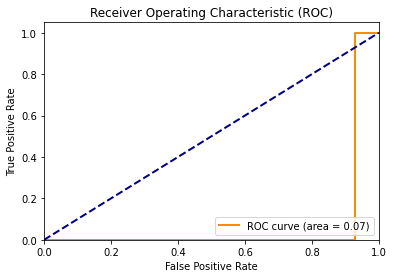

In [5]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.metrics import roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt

# Load the fraud indicator dataset
# Replace 'path_to_fraud_dataset.csv' with the actual path to your dataset
fraud_data = pd.read_csv('year2013_2014_combined_with_labels.csv')


# Data preprocessing
fraud_data.fillna(0, inplace=True)
fraud_data.drop('Unnamed: 0', axis=1, inplace=True)

fraud_data['Rndrng_Prvdr_Type'] = fraud_data['Rndrng_Prvdr_Type'].astype('category').cat.codes
fraud_data['Rndrng_Prvdr_Gndr'] = fraud_data['Rndrng_Prvdr_Gndr'].astype('category').cat.codes
fraud_data['Rndrng_Prvdr_Mdcr_Prtcptg_Ind'] = fraud_data['Rndrng_Prvdr_Mdcr_Prtcptg_Ind'].astype('category').cat.codes

# Take a random sample of the dataset
sample_size = 1000  # Adjust the sample size as needed
fraud_data_sample = fraud_data.sample(n=sample_size, random_state=42)

# Assume that 'fraud_indicator' is the column containing the target variable
X = fraud_data_sample.drop('Fraud_Indicator', axis=1)
y = fraud_data_sample['Fraud_Indicator']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the SVM model
svm_model = SVC(kernel='linear', probability=True, C=5.0)  # You can experiment with different values of C
svm_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_test_pred = svm_model.predict_proba(X_test_scaled)[:, 1]

# Calculate the ROC-AUC score
test_auc = roc_auc_score(y_test, y_test_pred)
print('Test AUC:', test_auc)

# Get ROC curve data
fpr, tpr, _ = roc_curve(y_test, y_test_pred)
roc_auc_curve = auc(fpr, tpr)

# Print ROC-AUC score
print("ROC-AUC:", roc_auc_curve)  # Corrected here

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_curve)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()
